# Cameroon Advance Analytic Ultrasound Image Challenge by Camair-AI Final Notebook:
by the Team Melie_JC

In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install keras
!pip install tensorflow
!pip install sklearn

## Importation des librairies

In [ ]:
import os
os.environ['PYTHONHASHSEED'] = str(1)
SEEDNUM = 725

import pandas as pd
import pickle
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Model,layers
import tensorflow as tf
from keras.models import load_model
import matplotlib.pyplot as plt
import random
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import Dense
from keras.models import Sequential, load_model
from sklearn.preprocessing import StandardScaler

In [ ]:
# Modifier le chemin en fonction de la situation (mettre la chaine vide si le notebook est dans le meme
# repertoire que le dossier des images et les fichiers Train.csv et Test.csv )

drive_path = ''


data = pd.read_csv(drive_path+'Train.csv', delimiter=',')
datatest = pd.read_csv(drive_path+'Test.csv', delimiter=',')
target = data["target"]
dictimg = []
dictimgtest = []
for i in range(len(target)):
    img = Image.open(drive_path+"CAMAIRAI BOX READY/"+str(data["img_IDs"][i]) +".jpg")
    img = img.resize((224,224) , Image.ANTIALIAS)
    wi = np.array(img)
    dictimg.append(wi.copy())
    img.close()

for i in range(len(datatest["img_IDs"])):
    img = Image.open(drive_path+"CAMAIRAI BOX READY/"+str(datatest["img_IDs"][i]) +".jpg")
    img = img.resize((224,224) , Image.ANTIALIAS)
    wi = np.array(img)
    dictimgtest.append(wi.copy())
    img.close()


TrainX = np.array(dictimg)
TrainY = target.to_numpy()
Test = np.array(dictimgtest)

print(TrainX.shape)
print(TrainY.shape)
print(Test.shape)


(100, 224, 224, 3)
(100,)
(34, 224, 224, 3)


## Data Preprocessing

Fixation du seed

In [ ]:
def reset_random_seeds():
    os.environ['PYTHONHASHSEED'] = str(1)
    tf.random.set_seed(SEEDNUM)
    np.random.seed(SEEDNUM)
    random.seed(SEEDNUM)

reset_random_seeds()

Data augmentation

In [ ]:
train_datagen = ImageDataGenerator(rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True
                                    )

train_generator = train_datagen.flow(TrainX,
                                     TrainY,
                                     batch_size=50,
                                     shuffle=True,
                                     seed=42
                                     )

## Construction of the model for learning

In [ ]:
model_res50 = Sequential()
model_res50.add(ResNet50( include_top=False, pooling='avg'))
model_res50.add(Dense(1500, activation='relu'))
model_res50.add(Dense(1000, activation='relu'))
model_res50.add(Dense(500, activation='relu'))
model_res50.add(Dense(250, activation='relu'))
model_res50.add(Dense(1, activation='sigmoid'))
model_res50.layers[0].trainable = False


model_res50.compile(optimizer='adam',
              loss=['binary_crossentropy', "mse"],
              metrics=['accuracy', 'mse'],loss_weights=[5,5])


model_res50.summary()


94773248/94765736 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense (Dense)                (None, 1500)              3073500   
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              1501000   
_________________________________________________________________
dense_2 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_3 (Dense)              (None, 250)               125250    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 251       
Total params: 28,788,213
Trainable params: 5,200,501
Non-

## Learning

Epoch 1/500
2/2 [==============================] - 18s 7s/step - loss: 7.6509 - accuracy: 0.4533 - mse: 0.3814
Epoch 2/500
2/2 [==============================] - 14s 7s/step - loss: 4.0670 - accuracy: 0.4933 - mse: 0.2836
Epoch 3/500
2/2 [==============================] - 14s 7s/step - loss: 3.3208 - accuracy: 0.6667 - mse: 0.2356
Epoch 4/500
2/2 [==============================] - 14s 7s/step - loss: 3.4438 - accuracy: 0.6800 - mse: 0.2381
Epoch 5/500
2/2 [==============================] - 14s 7s/step - loss: 4.6961 - accuracy: 0.3667 - mse: 0.3556
Epoch 6/500
2/2 [==============================] - 14s 7s/step - loss: 3.8930 - accuracy: 0.6467 - mse: 0.2693
Epoch 7/500
2/2 [==============================] - 14s 7s/step - loss: 3.7911 - accuracy: 0.5600 - mse: 0.2762
Epoch 8/500
2/2 [==============================] - 14s 7s/step - loss: 3.4566 - accuracy: 0.4867 - mse: 0.2492
Epoch 9/500
2/2 [==============================] - 14s 7s/step - loss: 3.2330 - accuracy: 0.6600 - mse: 0.2264
E

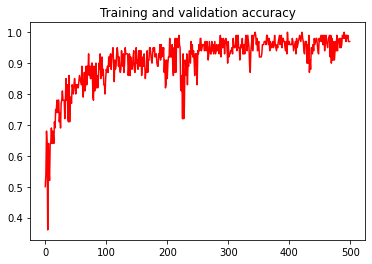

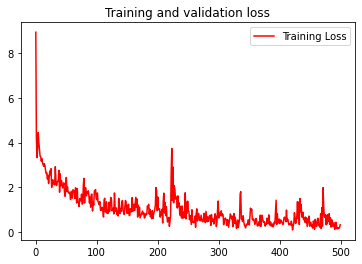

In [ ]:
history = model_res50.fit(
    train_generator,
    epochs=500,
    verbose=1,
)

acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.title('Training and validation accuracy')
plt.figure()
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Generation of the solution

In [ ]:
def generateursubmit(datatest,prediction,name):
    i = -1
    data = pd.DataFrame(columns = ['img_IDs','target'])

    for iddata in datatest['img_IDs']:
        i = i+1
        newRow = pd.DataFrame(data = np.array([[iddata, float(prediction[i])]]), columns = ['img_IDs', 'target'])
        data = pd.concat([data,newRow], ignore_index = True)

    path = name + ".csv"
    data.to_csv(path, index = False)

    return data

TestFrame = pd.read_csv(drive_path+'Test.csv', delimiter=',')
prediction = model_res50.predict(Test)

y = prediction
print(prediction)
y = y.astype(float)
generateursubmit(TestFrame,y, drive_path+'submit_res50_AugmenteTrainN')

[[0.83006346]
 [0.9986864 ]
 [0.99514514]
 [0.9972616 ]
 [0.99998844]
 [0.99998826]
 [0.99999136]
 [0.86494434]
 [0.99999154]
 [0.01298165]
 [1.        ]
 [0.9999896 ]
 [0.99999976]
 [0.9999881 ]
 [1.        ]
 [0.00193885]
 [0.9995705 ]
 [0.9999988 ]
 [0.9747253 ]
 [0.9997443 ]
 [0.9933919 ]
 [0.93263495]
 [0.9999969 ]
 [1.        ]
 [1.        ]
 [0.9999985 ]
 [0.01536298]
 [0.00213113]
 [0.00602308]
 [0.99999964]
 [1.        ]
 [0.9925027 ]
 [0.99822295]
 [0.33543265]]


,img_IDs,target
0,ID_07VWE8S4AH,0.8300634622573853
1,ID_1TTSQF7HN0,0.9986863732337952
2,ID_21WVBU9ZMU,0.9951451420783997
3,ID_2MHAFTL1KN,0.9972615838050842
4,ID_37ULEGW12M,0.9999884366989136
5,ID_8REUNTV3UL,0.9999882578849792
6,ID_8YJA423CAB,0.9999913573265076
7,ID_9HM1CMMDEI,0.864944338798523
8,ID_9NAGF1CGWB,0.9999915361404419
9,ID_9PHABIBP5K,0.012981653213500977
